In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

from os.path import join
import os

In [2]:
odd = pd.read_csv(join('data', 'data_odd_aggregate.csv'), index_col=0)
odd.head()

,subject,trial,rt,choice,item_value_0,item_value_1,item_value_2,gaze_0,gaze_1,gaze_2,n_items,dataset
1,0,1,1913.0,0.0,3.0,2.0,NaN,0.466578,0.533422,NaN,2,krajbich2010
3,0,3,2051.0,1.0,6.0,6.0,NaN,0.464375,0.535625,NaN,2,krajbich2010
5,0,5,2504.0,0.0,6.0,2.0,NaN,0.524205,0.475795,NaN,2,krajbich2010
7,0,7,1426.0,0.0,6.0,5.0,NaN,1.000000,0.000000,NaN,2,krajbich2010
9,0,9,1209.0,0.0,6.0,8.0,NaN,0.429714,0.570286,NaN,2,krajbich2010


In [3]:
prediction_multiplicative_list = []
prediction_nobias_list = []

# join prediction dataframes
for subject in odd['subject'].unique():
    subject_pred_multiplicative = pd.read_csv(os.path.join('results', 'predictions', 'out_of_sample', 'multiplicative', 'prediction_{}_multiplicative_oos.csv'.format(subject)), index_col=0)
    subject_pred_nobias = pd.read_csv(os.path.join('results', 'predictions', 'out_of_sample', 'nobias', 'prediction_{}_nobias_oos.csv'.format(subject)), index_col=0)
    subject_pred_multiplicative['subject'] = subject
    subject_pred_nobias['subject'] = subject
    
    prediction_multiplicative_list.append(subject_pred_multiplicative)
    prediction_nobias_list.append(subject_pred_nobias)

prediction_multiplicative = pd.concat(prediction_multiplicative_list)
del prediction_multiplicative_list
prediction_nobias = pd.concat(prediction_nobias_list)
del prediction_nobias_list

/Users/felixmolter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  
/Users/felixmolter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  app.launch_new_instance()


In [4]:
# discard trials with negative predicted RT
prediction_multiplicative = prediction_multiplicative[prediction_multiplicative['rt'] > 0].copy()

In [5]:
prediction_multiplicative.head()

,choice,dataset,gamma,gaze_0,gaze_1,gaze_2,item_value_0,item_value_1,item_value_2,n_items,repeat,rt,s,subject,t0,tau,trial,v
0,1.0,krajbich2010,0.65,0.466578,0.533422,NaN,3.0,2.0,NaN,2.0,0.0,1247.0,0.008368,0,0.0,0.44,1.0,0.000098
1,0.0,krajbich2010,0.65,0.466578,0.533422,NaN,3.0,2.0,NaN,2.0,1.0,3079.0,0.008368,0,0.0,0.44,1.0,0.000098
2,0.0,krajbich2010,0.65,0.466578,0.533422,NaN,3.0,2.0,NaN,2.0,2.0,2398.0,0.008368,0,0.0,0.44,1.0,0.000098
3,0.0,krajbich2010,0.65,0.466578,0.533422,NaN,3.0,2.0,NaN,2.0,3.0,960.0,0.008368,0,0.0,0.44,1.0,0.000098
4,0.0,krajbich2010,0.65,0.466578,0.533422,NaN,3.0,2.0,NaN,2.0,4.0,1515.0,0.008368,0,0.0,0.44,1.0,0.000098


In [6]:
def add_best_chosen(df):
    df = df.copy()
    value_cols = [col for col in df.columns
                  if col.startswith('item_value_')]
    values = df[value_cols].values
    df['best_chosen'] = df['choice'] == np.nanargmax(values, axis=1)
    return df

In [7]:
prediction_multiplicative = add_best_chosen(prediction_multiplicative)

In [8]:
pred_multiplicative_summary = prediction_multiplicative.groupby(['subject', 'best_chosen'])['rt'].describe().reset_index()
pred_multiplicative_summary.head()

,subject,best_chosen,count,mean,std,min,25%,50%,75%,max
0,0,False,290.0,1748.165517,642.029002,653.0,1310.25,1641.0,2032.25,4065.0
1,0,True,1960.0,1387.736735,505.208074,419.0,1035.00,1287.0,1620.25,4090.0
2,1,False,1012.0,1481.964427,773.630710,311.0,946.75,1289.5,1809.50,5570.0
3,1,True,1438.0,1416.004172,748.509518,259.0,897.25,1226.0,1708.75,5175.0
4,2,False,547.0,4576.968921,2839.395363,602.0,2550.50,3902.0,5713.00,20673.0


In [9]:
pred_multiplicative_summary['dataset'] = [odd.loc[odd['subject'] == subject, 'dataset'].head(1).values[0]
                                          for subject in pred_multiplicative_summary['subject']]

In [10]:
odd = add_best_chosen(odd)

In [11]:
odd_summary = odd.groupby(['subject', 'best_chosen'])['rt'].describe().reset_index()
odd_summary.head()

,subject,best_chosen,count,mean,std,min,25%,50%,75%,max
0,0,False,11.0,1926.636364,892.757892,898.0,1296.50,1713.0,2153.50,3582.0
1,0,True,34.0,1632.205882,892.802967,682.0,1059.50,1330.0,1866.50,4142.0
2,1,False,17.0,1642.117647,897.868858,743.0,1128.00,1332.0,1847.00,4602.0
3,1,True,32.0,1774.375000,859.613407,878.0,1192.25,1494.0,2167.75,4422.0
4,2,False,11.0,4756.636364,2437.472473,1917.0,2750.00,5164.0,5720.00,9120.0


In [12]:
def rt_dists_individual(prediction, data, figsize=(7.5, 8), fontsize=8):

    fig, axs = plt.subplots(1, 6, figsize=figsize, sharey=True, sharex=True)
    
    subjects = prediction['subject'].unique()
    # remove subjects for which we don't have predictions yet
    data = data[data['subject'].isin(subjects)].copy()
    
    # colors
    dataset_idx = pd.Categorical(prediction['dataset'],
                                 categories=['krajbich2010', 'krajbich2011', 'folke2016', 'tavares2017'],
                                 ordered=True).codes
    colors = np.array(['C0', 'C1', 'C2', 'C3'])[dataset_idx][::2]
    
    i = 0
    for best_chosen in [True, False]:
        for q in ['25%', '50%', '75%']:
            rel_diff = ((prediction[prediction['best_chosen'] == best_chosen][q].values -
                         data[data['best_chosen'] == best_chosen][q].values) /
                        data[data['best_chosen'] == best_chosen][q].values)
            axs[i].scatter(rel_diff, data[data['best_chosen'] == best_chosen]['subject'],
                           marker='+', color=colors)
            if best_chosen is False:
                axs[i].axvline(0, color='red', alpha=0.5, zorder=-1)
            else:
                axs[i].axvline(0, color='black', alpha=0.5, zorder=-1)
            axs[i].spines['left'].set_visible(False)
            axs[i].spines['right'].set_visible(False)
            axs[i].spines['top'].set_visible(False)
            axs[i].set_xlim(-1*np.max(np.abs(rel_diff))*1.1, np.max(np.abs(rel_diff))*1.1)
            axs[i].tick_params(axis='both', which='major', labelsize=fontsize)
            i += 1

    axs[0].set_title('25%', fontsize=fontsize)
    axs[1].set_title('Best chosen\n\n50%', fontsize=fontsize)
    axs[2].set_title('75%', fontsize=fontsize)
    
    axs[3].set_title('25%', fontsize=fontsize, color='red')
    axs[4].set_title('Not best chosen\n\n50%', fontsize=fontsize, color='red')
    axs[5].set_title('75%', fontsize=fontsize, color='red')
    
            
    axs[0].spines['left'].set_visible(True)
    # axs[3].spines['left'].set_visible(True)

    axs[0].set_ylabel('Participant', fontsize=fontsize)
    axs[0].set_yticks([])
    
    fig.tight_layout()
    fig.text(0.5, -0.025, 'Relative error\nin RT quantile predictions', ha='center', fontsize=fontsize)
    return fig, axs

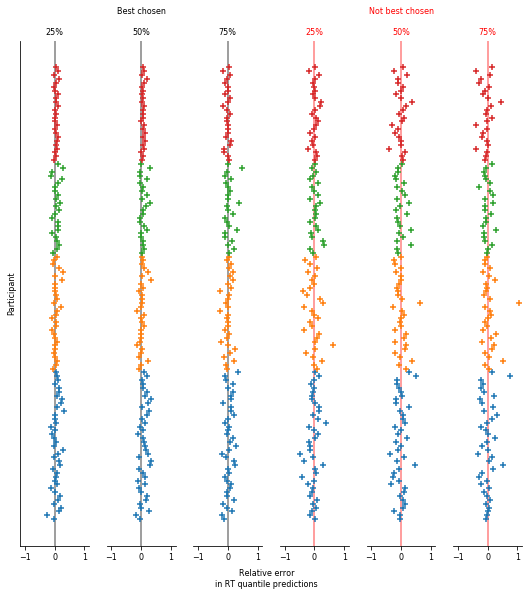

In [13]:
rt_dists_individual(pred_multiplicative_summary, odd_summary);
plt.savefig(join('results', 'figures', 'si_figure_5_individual_rt_distributions.png'), dpi=330, bbox_inches='tight')

In [14]:
def rt_dists_aggregate(data, predictions, fontsize=8, bins=np.linspace(0, 15000, 100), figsize=(7.5, 7.5)):

    fig, axs = plt.subplots(4, 2, figsize=figsize, sharey=True, sharex=True)

    for d, dataset in enumerate(data['dataset'].unique()):

        for i, best_chosen in enumerate([True, False]):

            weights_data = np.empty_like(data['rt'][(data['best_chosen'] == best_chosen) & (data['dataset'] == dataset)].values)
            weights_data.fill((data[data['dataset'] == dataset]['best_chosen'] == best_chosen).mean() * (len(bins) - 1) / (bins[-1] - bins[0]) / weights_data.size)
            
            weights_pred = np.empty_like(predictions['rt'][(predictions['best_chosen'] == best_chosen) & (predictions['dataset'] == dataset)].values)
            weights_pred.fill((predictions[predictions['dataset'] == dataset]['best_chosen'] == best_chosen).mean() * (len(bins) - 1) / (bins[-1] - bins[0]) / weights_pred.size)

            axs[d, i].hist(data['rt'][(data['best_chosen'] == best_chosen) & (data['dataset'] == dataset)],
                           bins=bins, histtype='step', color='black', weights=weights_data, label='Data');
            axs[d, i].hist(predictions['rt'][(predictions['best_chosen'] == best_chosen) & (predictions['dataset'] == dataset)],
                           bins=bins, histtype='step', color='red', weights=weights_pred, label='Prediction');
            axs[d, i].tick_params(axis='both', which='major', labelsize=fontsize)
            axs[d, i].spines['right'].set_visible(False)
            axs[d, i].spines['top'].set_visible(False)

    
    axs[0, 0].legend(loc='upper right', frameon=False, fontsize=fontsize)
    axs[0, 0].set_title('Best chosen', fontsize=fontsize)
    axs[0, 1].set_title('Not best chosen', fontsize=fontsize)
    axs[0, 0].set_ylabel('Krajbich 2010\n\nDensity', fontsize=fontsize)
    axs[1, 0].set_ylabel('Krajbich 2011\n\nDensity', fontsize=fontsize)
    axs[2, 0].set_ylabel('Folke 2016\n\nDensity', fontsize=fontsize)
    axs[3, 0].set_ylabel('Tavares 2017\n\nDensity', fontsize=fontsize)
    
    axs[3, 0].set_xlabel('Response time (ms)', fontsize=fontsize)
    axs[3, 1].set_xlabel('Response time (ms)', fontsize=fontsize)
    
    fig.tight_layout()
    
    return fig, axs

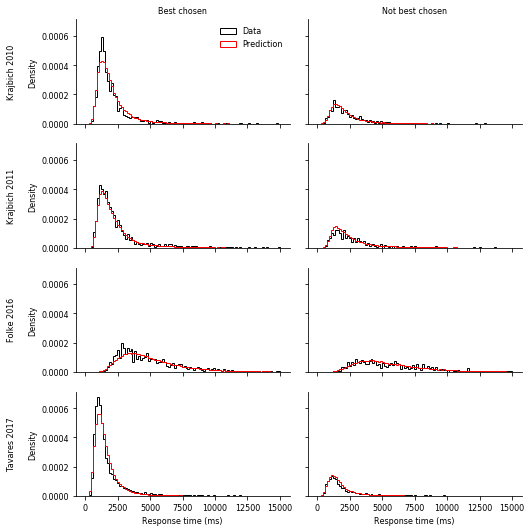

In [15]:
rt_dists_aggregate(odd, prediction_multiplicative);
plt.savefig(join('results', 'figures', 'si_figure_4_aggregate_rt_distributions.png'), dpi=330, bbox_inches='tight')